# Section 1

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [38]:
image= cv2.imread('cat1.jpeg',0)

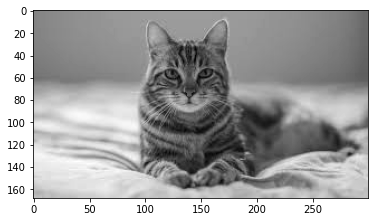

In [39]:
plt.imshow(image, cmap='gray')
plt.show()

In [40]:
cv2.imshow('Cat pic', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:
type(image)

numpy.ndarray

In [42]:
image.shape

(168, 300)

In [43]:
image.dtype

dtype('uint8')

In [44]:
x= np.arange(0,256)

In [45]:
x= x.reshape(-1,int(x.shape[0]**0.5))
x.shape

(16, 16)

In [46]:
x[:5,:5]

array([[ 0,  1,  2,  3,  4],
       [16, 17, 18, 19, 20],
       [32, 33, 34, 35, 36],
       [48, 49, 50, 51, 52],
       [64, 65, 66, 67, 68]])

In [47]:
x[-5:, -5:]

array([[187, 188, 189, 190, 191],
       [203, 204, 205, 206, 207],
       [219, 220, 221, 222, 223],
       [235, 236, 237, 238, 239],
       [251, 252, 253, 254, 255]])

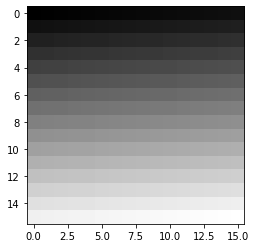

In [48]:
plt.imshow(x, cmap='gray')
plt.show()

In [49]:
x= np.arange(0,256).reshape(1,-1)
y= None
for i in range(200):
    if y is None:
        y= np.vstack((x,x))
    else:
        y= np.vstack((y,x))
        

In [50]:
y.shape

(201, 256)

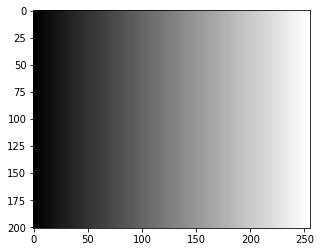

In [51]:
plt.imshow(y, cmap='gray')
plt.show()

In [52]:
binary_image= np.zeros((360,360), dtype=np.uint8)
binary_image[120:240,:]+=255

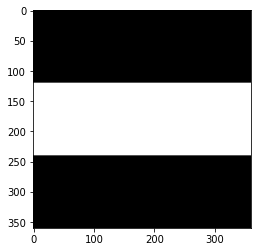

In [53]:
plt.imshow(binary_image, cmap='gray')
plt.show()

# --------------------------------------------------------------

# Section2

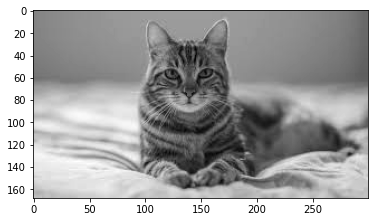

In [54]:
plt.imshow(image, cmap='gray')
plt.show()

In [55]:
print(np.mean(image))
print(image.shape)
print(np.mean(image,0).shape)
print(np.mean(image,1).shape)

144.4284722222222
(168, 300)
(300,)
(168,)


In [56]:
## We can do the same using std (Standard Deviation)

In [57]:
print(np.max(image))
print(np.min(image))

248
9


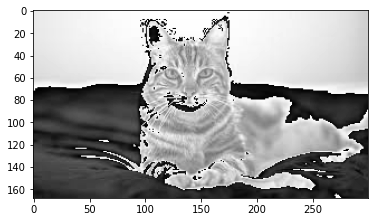

In [58]:
imageX = image+ 100
plt.imshow(imageX, cmap='gray')
plt.show()

In [59]:
imageX = image.astype(int)+ 100
print(np.max(imageX))
print(np.min(imageX))

348
109


In [60]:
imageX[imageX>255]= 255
image.astype(np.uint8)
print(np.max(imageX))
print(np.min(imageX))

255
109


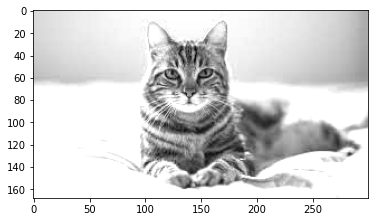

In [61]:
plt.imshow(imageX, cmap='gray')
plt.show()

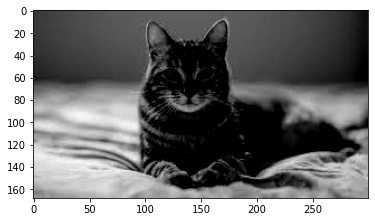

In [62]:
imageY = image.astype(int)- 100
imageY[imageY<0]= 0
imageY= imageY.astype(np.uint8)
plt.imshow(imageY, cmap='gray')
plt.show()

In [63]:
left_part=image[:, 0:image.shape[1]//3]
right_part= image[:,(image.shape[1]*2)//3:]
center_part= image[:,image.shape[1]//3:(image.shape[1]*2)//3]

In [64]:
cv2.imshow('left',left_part)
cv2.imshow('right',right_part)
cv2.imshow('center',center_part)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [65]:
point1= None
point2= None
segment= None
def partition(event,x,y,flags,param): 
    global point1,point2,segment
    if(event == cv2.EVENT_LBUTTONDBLCLK):  
            print(f'New point is {(x,y)}')
            if point1 is None:
                point1= (x,y)
                print('Point 1  done')
            elif point2 is None:
                point2= (x,y)

                minX= min(point1[0],point2[0])
                maxX= max(point1[0],point2[0])
                minY= min(point1[1],point2[1])
                maxY= max(point1[1],point2[1])
                if minX != maxX and minY != maxY:
                    segment= image[minY:maxY, minX:maxX]   
                    print(segment.shape)
                point1= None
                point2= None
cv2.namedWindow('image')  
cv2.setMouseCallback('image',partition)  
try:
    while(1):  
        cv2.imshow('image',image)  
        if segment is not None:
            cv2.imshow('segment',segment)  
        if cv2.waitKey(20) & 0xFF == 27:  
            break 
except Exception as e:
    print(e)
cv2.destroyAllWindows()

In [66]:
cat1= image
cat2= cv2.imread('cat2.jpeg',0)
dog1= cv2.imread('dog1.jpeg', 0)

# Section3

In [67]:
def display2Images(img1,img2):
    fig= plt.figure(figsize=(10,20))
    fig.add_subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.axis('off')
    plt.title("First")
    
    fig.add_subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.axis('off')
    plt.title("Second")
    plt.show()
    
    

def displayImage(img):
    plt.imshow(img, cmap='gray')
    plt.show()
    

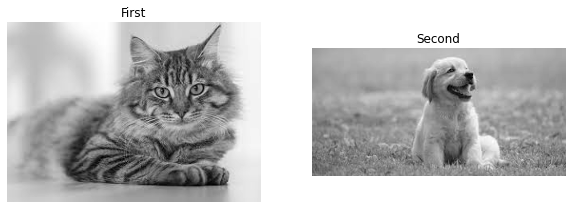

In [68]:
display2Images(cat2,dog1)

In [69]:
print(cat1.shape)
print(cat2.shape)
print(dog1.shape)
dog1+cat1

(168, 300)
(189, 267)
(159, 317)


ValueError: operands could not be broadcast together with shapes (159,317) (168,300) 

In [71]:
dog_resize= cv2.resize(dog1, cat2.shape)

In [72]:
print(dog_resize.shape)
print(cat2.shape)

(267, 189)
(189, 267)


In [73]:
dog_resize= cv2.resize(dog1, (cat2.shape[1], cat2.shape[0]))

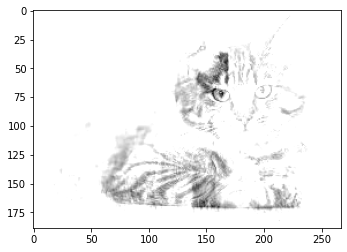

In [74]:
new_image= dog_resize.astype(int) + cat2.astype(int)
new_image[new_image>255]= 255
displayImage(new_image)

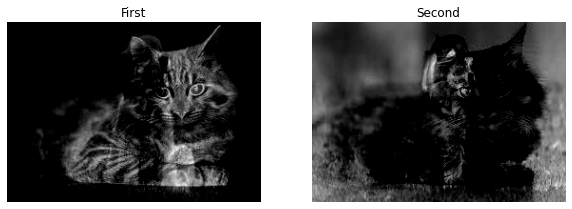

In [75]:
new_image1= dog_resize.astype(int) - cat2.astype(int)
new_image1[new_image1<0]= 0

new_image2= cat2.astype(int)- dog_resize.astype(int)
new_image2[new_image2<0]= 0

display2Images(new_image1,new_image2)

In [76]:
cat1_resize= cv2.resize(cat1, (cat2.shape[1], cat2.shape[0]))

(189, 267)
(189, 267)


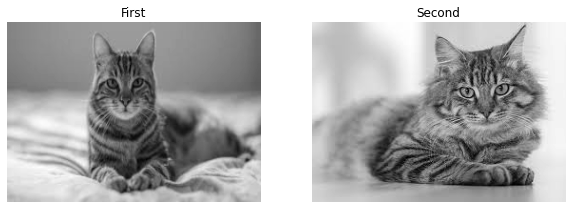

In [77]:
print(cat1_resize.shape)
print(cat2.shape)
display2Images(cat1_resize, cat2)

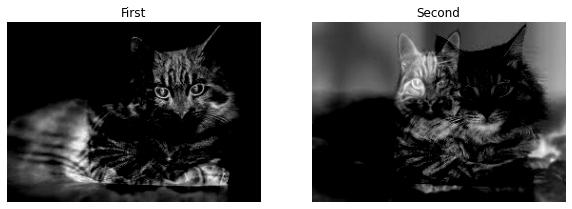

In [78]:
new_image1= cat1_resize.astype(int) - cat2.astype(int)
new_image1[new_image1<0]= 0

new_image2= cat2.astype(int)- cat1_resize.astype(int)
new_image2[new_image2<0]= 0

display2Images(new_image1,new_image2)

# ---------------------------------------------------------------
# Section 4

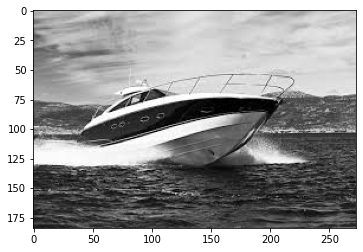

In [79]:
boat= cv2.imread('boat1.jpeg', 0)
displayImage(boat)

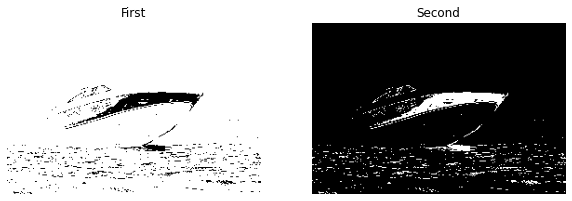

In [80]:
ret,thresh1 = cv2.threshold(boat,25,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(boat,25,255,cv2.THRESH_BINARY_INV)

display2Images(thresh1, thresh2)

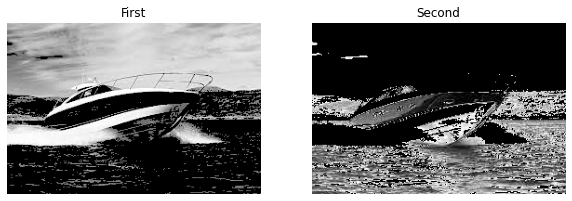

In [81]:
ret,thresh1 = cv2.threshold(boat,100,255,cv2.THRESH_TOZERO)
ret,thresh2 = cv2.threshold(boat,100,255,cv2.THRESH_TOZERO_INV)

display2Images(thresh1, thresh2)

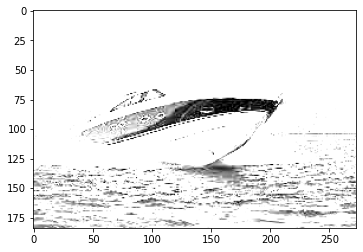

In [82]:
ret,thresh3 = cv2.threshold(boat,50,255,cv2.THRESH_TRUNC)
displayImage(thresh3)

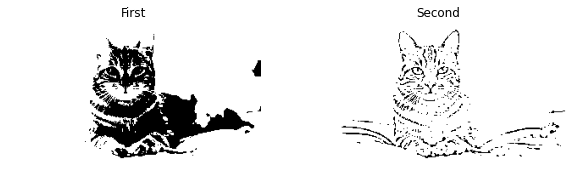

In [83]:
ret,thresh = cv2.threshold(cat1,100,255,cv2.THRESH_BINARY)

adaptive_thresh= cv2.adaptiveThreshold(cat1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,20)

display2Images(thresh, adaptive_thresh)

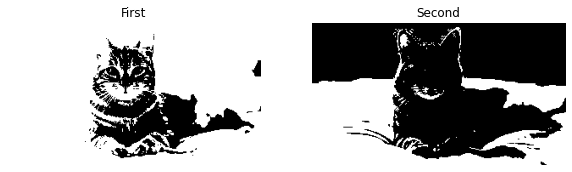

In [84]:
ret,thresh = cv2.threshold(cat1,100,255,cv2.THRESH_BINARY)
_,OTSU_thresh= cv2.threshold(cat1,100,255,cv2.THRESH_BINARY+ cv2.THRESH_OTSU)
display2Images(thresh, OTSU_thresh)

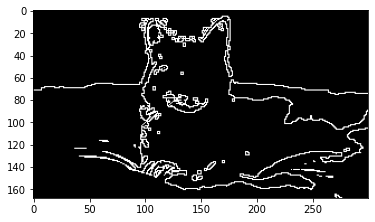

In [85]:
adaptive_thresh2= cv2.adaptiveThreshold(OTSU_thresh,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,3,5)
displayImage(adaptive_thresh2)

# ---------------------------------------------------
# Section 5

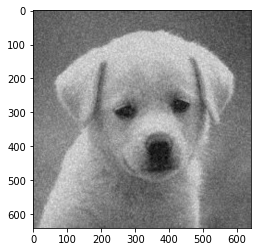

In [86]:
noisy_image= cv2.resize(cv2.imread('noisy_img.jpeg',0), (640,640))
displayImage(noisy_image)

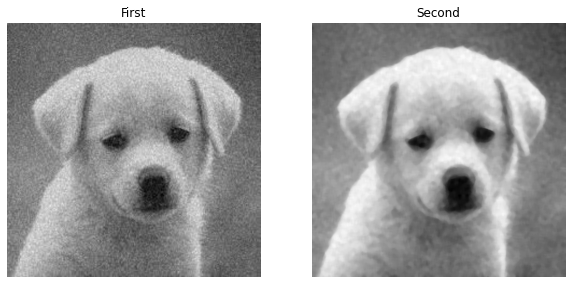

In [87]:
blurred_image= cv2.medianBlur(noisy_image, 11)
display2Images(noisy_image, blurred_image)

In [89]:
prewittX_kernel= np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])
# filtered_img1= np.zeros_like(noisy_image)
filtered_img1= cv2.filter2D(noisy_image,-1, prewittX_kernel)

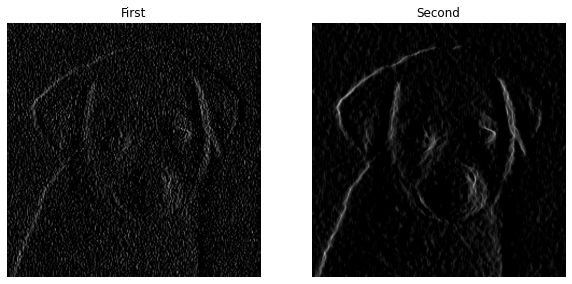

In [93]:
filtered_img2= cv2.filter2D(blurred_image,-1,prewittX_kernel)
display2Images(filtered_img1,filtered_img2)

# ---------------------------------------------------------------------
# Section 6

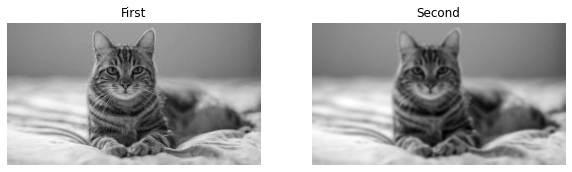

In [111]:
blurred_cat= cv2.GaussianBlur(cat1, (5,5), 0)
display2Images(cat1,blurred_cat)

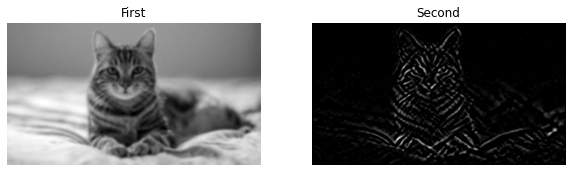

In [114]:
sobel_xy_detector= cv2.Sobel(blurred_cat, -1, 1,1,3)
display2Images(blurred_cat, sobel_xy_detector)

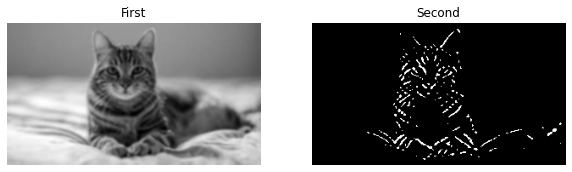

In [119]:
display2Images(blurred_cat, cv2.threshold(sobel_xy_detector, 15,255,cv2.THRESH_BINARY)[1])

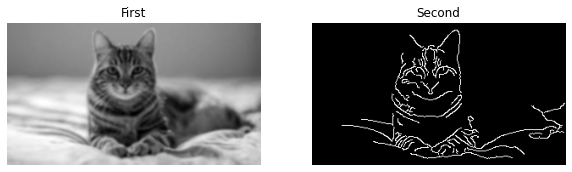

In [120]:
canny_edges = cv2.Canny(image=blurred_cat, threshold1=100, threshold2=200)
display2Images(blurred_cat, canny_edges)

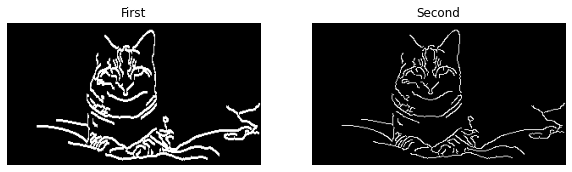

In [134]:
kernel= (10,10)
image= canny_edges
for i in range(2):
    image= cv2.dilate(image, kernel)
display2Images(image,canny_edges)